## Importing dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
Books=pd.read_csv("C:/Users/anshika/Documents/DATASETS/book recommendation dataset/Books.csv",low_memory=False)

In [5]:
Ratings=pd.read_csv("C:/Users/anshika/Documents/DATASETS/book recommendation dataset/Ratings.csv")

In [6]:
Users=pd.read_csv("C:/Users/anshika/Documents/DATASETS/book recommendation dataset/Users.csv")

In [7]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
print(Books.shape)
print(Ratings.shape)
print(Users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [11]:
Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
Users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Exploratory Data Analysis (EDA)

In [14]:
Books['Publisher'].value_counts()

Publisher
Harlequin                          7535
Silhouette                         4220
Pocket                             3905
Ballantine Books                   3783
Bantam Books                       3646
                                   ... 
Scholastic (An Apple Paperback)       1
Spencer Butte Press                   1
Kowalski                              1
Madere Enterprises                    1
Scholstic                             1
Name: count, Length: 16807, dtype: int64

In [15]:
most_rated_books = Ratings.groupby("ISBN").count()["Book-Rating"].sort_values(ascending=False).head(10)
most_rated_books=pd.DataFrame(most_rated_books)
most_rated_books

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0679781587,639
0142001740,615
067976402X,614


In [16]:
Books['Book-Author'].value_counts()

Book-Author
Agatha Christie            632
William Shakespeare        567
Stephen King               524
Ann M. Martin              423
Carolyn Keene              373
                          ... 
JÃ¶rn Kalkbrenner            1
Paul A. Lynn                 1
Arthur Bernard Williams      1
Fred Ruckdeschel             1
Glass Charles                1
Name: count, Length: 102022, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

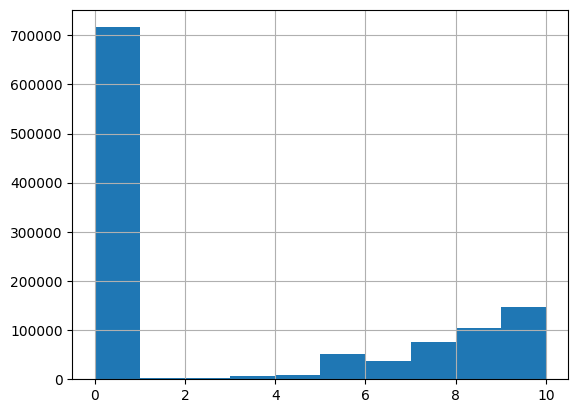

In [18]:
Ratings["Book-Rating"].hist(bins=10)

## ANALYSIS

## The top three publishers are:

1. Harlequin

2. Silhouette 

3. pocket



## Most rated books are

1. 0971880107     2502

2. 0316666343     1295

3. 0385504209     883

## Top Authors

1. Agatha Christie         632

2. William Shakespeare     567

3. Stephen King            524


## Popularity Based Recommender System

In [19]:
rating_with_name=Ratings.merge(Books,on='ISBN')

In [21]:
rating_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [22]:
num_rating_df = rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [23]:
num_rating_df

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [24]:
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [25]:
rating_with_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [26]:
avg_rating_df=rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [27]:
popular_df=num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.head()

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [28]:
popular_df.sort_values('num_ratings',ascending=False).head()

,Book-Title,num_ratings,avg_rating
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193


Considering  the book as popular if it has more than 250 num_ratings

In [29]:
popular_df[popular_df['num_ratings']>250].shape

(186, 3)

In [30]:
popular_df=popular_df[popular_df['num_ratings']>250].sort_values('avg_rating',ascending=False)

In [31]:
popular_df.head()

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [32]:
popular_df.merge(Books,on='Book-Title').drop_duplicates('Book-Title').shape

(186, 10)

In [33]:
popular_df = popular_df.merge(Books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [34]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


## Collaborative Filtering Based Recommender System

In [35]:
rating_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [36]:
rating_with_name.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

In [37]:
x=rating_with_name.groupby('User-ID').count()['Book-Rating']>150
x[x]

User-ID
254       True
1733      True
1903      True
2033      True
2110      True
          ... 
277427    True
277478    True
277639    True
278188    True
278418    True
Name: Book-Rating, Length: 1115, dtype: bool

In [38]:
user_with_rating=x[x].index

In [39]:
user_with_rating

Index([   254,   1733,   1903,   2033,   2110,   2276,   2766,   2891,   2977,
         3363,
       ...
       274301, 274308, 274808, 275970, 276680, 277427, 277478, 277639, 278188,
       278418],
      dtype='int64', name='User-ID', length=1115)

In [40]:
filtered_rating=rating_with_name[rating_with_name['User-ID'].isin(user_with_rating)]

In [41]:
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [42]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=30
famous_books=y[y].index

In [43]:

final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [44]:
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1157,277427,0060177721,0,Finding Moon,Tony Hillerman,1995,Harpercollins,http://images.amazon.com/images/P/0060177721.0...,http://images.amazon.com/images/P/0060177721.0...,http://images.amazon.com/images/P/0060177721.0...
1159,277427,0060542128,7,When the Storm Breaks,Heather Lowell,2003,HarperTorch,http://images.amazon.com/images/P/0060542128.0...,http://images.amazon.com/images/P/0060542128.0...,http://images.amazon.com/images/P/0060542128.0...
1162,277427,006092988X,0,A Tree Grows in Brooklyn,Betty Smith,1998,Perennial,http://images.amazon.com/images/P/006092988X.0...,http://images.amazon.com/images/P/006092988X.0...,http://images.amazon.com/images/P/006092988X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...


In [45]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [46]:
pt.fillna(0,inplace=True)
pt

User-ID,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274301,274308,274808,275970,276680,277427,277478,277639,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zlata's Diary: A Child's Life in Sarajevo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(pt)

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0454516 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.07162105],
       [0.        , 0.        , 1.        , ..., 0.        , 0.06448266,
        0.03549567],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06448266, ..., 0.        , 1.        ,
        0.09936127],
       [0.0454516 , 0.07162105, 0.03549567, ..., 0.        , 0.09936127,
        1.        ]], shape=(1983, 1983))

In [48]:
similarity_scores=cosine_similarity(pt)

In [49]:
similarity_scores.shape

(1983, 1983)

In [50]:
def recommend(bookname):
  index=np.where(pt.index==bookname)[0][0]
  similar_items=sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
  for i in similar_items:
    print(pt.index[i[0]])

In [51]:
import pickle

In [52]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [53]:
import os
import pickle

# Create artifacts folder
os.makedirs('artifacts', exist_ok=True)

# Save files
pickle.dump(popular_df, open('artifacts/popular.pkl', 'wb'))
pickle.dump(pt, open('artifacts/pt.pkl', 'wb'))
pickle.dump(Books, open('artifacts/books.pkl', 'wb'))
pickle.dump(similarity_scores, open('artifacts/similarity_scores.pkl', 'wb'))

In [54]:
import os
artifacts_path = os.path.join(os.getcwd(), 'artifacts')
os.makedirs(artifacts_path, exist_ok=True)

pickle.dump(popular_df, open(os.path.join(artifacts_path, 'popular.pkl'), 'wb'))
pickle.dump(pt, open(os.path.join(artifacts_path, 'pt.pkl'), 'wb'))
pickle.dump(Books, open(os.path.join(artifacts_path, 'books.pkl'), 'wb'))
pickle.dump(similarity_scores, open(os.path.join(artifacts_path, 'similarity_scores.pkl'), 'wb'))


In [59]:
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\anshika\Documents\Book recommendation System\notebook


In [55]:
popular_df.shape

(186, 5)

In [56]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [57]:
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [58]:
import os
print(os.getcwd())

c:\Users\anshika\Documents\Book recommendation System\notebook


In [60]:
import os
import pickle

# Go one level up from notebook folder
project_root = os.path.dirname(os.getcwd())
artifacts_path = os.path.join(project_root, 'artifacts')
os.makedirs(artifacts_path, exist_ok=True)

# Save files
pickle.dump(popular_df, open(os.path.join(artifacts_path, 'popular.pkl'), 'wb'))
pickle.dump(pt, open(os.path.join(artifacts_path, 'pt.pkl'), 'wb'))
pickle.dump(Books, open(os.path.join(artifacts_path, 'books.pkl'), 'wb'))
pickle.dump(similarity_scores, open(os.path.join(artifacts_path, 'similarity_scores.pkl'), 'wb'))

print(f"Saved to: {artifacts_path}")

Saved to: c:\Users\anshika\Documents\Book recommendation System\artifacts
